# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations

Based on the 650 cities pulled across the globe, these are the observed trends
1. The correlation coefficient value shows a strong linear relationship between variables Max Temp & Latitude for Northern & Southern Hemisphere, Northern Hemosphere being more statistically significant than Southern Hemisphere. (Refer Fig1 & Fig2)

2. There is no significant relation between Latitude & Humidity or Latitude & Cloudiness for Northern & Southern Hemisphere

3. Further the cities are away from the equator the lower the temperature is


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudesa
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities lista
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q=darhan"
print(query_url)
response = requests.get(query_url).json()
pprint(response)

http://api.openweathermap.org/data/2.5/weather?appid=9f10635e8958847e05222543a337872b&units=Imperial&q=darhan
{'base': 'model',
 'clouds': {'all': 87},
 'cod': 200,
 'coord': {'lat': 49.49, 'lon': 105.92},
 'dt': 1580223555,
 'id': 2031964,
 'main': {'feels_like': -8.72,
          'grnd_level': 931,
          'humidity': 80,
          'pressure': 1033,
          'sea_level': 1033,
          'temp': 0.81,
          'temp_max': 0.81,
          'temp_min': 0.81},
 'name': 'Darhan',
 'sys': {'country': 'MN', 'sunrise': 1580171692, 'sunset': 1580204584},
 'timezone': 28800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 5.44}}


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=9f10635e8958847e05222543a337872b&units=Imperial&q=


In [5]:
citi_id=[]
for index, city in np.ndenumerate(cities):
    citi_id.append(index[0])
    print(index[0],": ", city)

0 :  sorland
1 :  teruel
2 :  bredasdorp
3 :  nome
4 :  povenets
5 :  cayenne
6 :  muisne
7 :  kieta
8 :  esperance
9 :  ceres
10 :  ushuaia
11 :  saleaula
12 :  faanui
13 :  puerto ayora
14 :  atuona
15 :  luderitz
16 :  hermanus
17 :  sosnovka
18 :  namibe
19 :  saskylakh
20 :  castro
21 :  isangel
22 :  illoqqortoormiut
23 :  saint george
24 :  albany
25 :  mar del plata
26 :  juneau
27 :  bluff
28 :  banjarmasin
29 :  tadine
30 :  hay river
31 :  jamestown
32 :  tasiilaq
33 :  whitehorse
34 :  erenhot
35 :  cochrane
36 :  hambantota
37 :  upernavik
38 :  lianzhou
39 :  barentsburg
40 :  ambilobe
41 :  bosobolo
42 :  tateyama
43 :  rikitea
44 :  fort-shevchenko
45 :  utiel
46 :  qaanaaq
47 :  vaini
48 :  thompson
49 :  punta arenas
50 :  salalah
51 :  pochutla
52 :  balkanabat
53 :  yellowknife
54 :  bambous virieux
55 :  broome
56 :  den helder
57 :  dingle
58 :  dekar
59 :  mount gambier
60 :  margate
61 :  chokurdakh
62 :  severo-kurilsk
63 :  tuatapere
64 :  medicine hat
65 :  t

635 :  nizhniy baskunchak
636 :  sorong
637 :  salgueiro
638 :  la serena
639 :  shuangcheng
640 :  akdepe
641 :  russell
642 :  namatanai
643 :  mont-de-marsan
644 :  prince george
645 :  kolosovka
646 :  padampur
647 :  aquin
648 :  buribay
649 :  sinkat
650 :  saint-pierre


In [6]:

city = []
cloudiness = []
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]


for city_ in cities:
    response = requests.get(query_url + city_).json()
    try:
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"{city_} FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    except:
        print(f"{city_} NOT FOUND *********")
        pass

sorland FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
teruel FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
bredasdorp FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
nome FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
povenets FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
cayenne FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
muisne FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kieta FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
esperance FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ceres FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ushuaia FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>

naron FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kodiak FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kapaa FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
cairns FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
aguas vermelhas FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
butaritari FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
cape town FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
grand river south east NOT FOUND *********
talnakh FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
christchurch FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
shahgarh FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

cidreira FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
rawson FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
hithadhoo FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
victoria FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yulara FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
mangan FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
sao joao da barra FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
lagoa FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
tiruvottiyur NOT FOUND *********
touros FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
east london FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
barro

kenai FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
magnolia FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
provideniya FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
tura FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
port-gentil FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kananga FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
mahebourg FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
erhlin NOT FOUND *********
barranca FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
khatanga FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
attawapiskat NOT FOUND *********
ucluelet FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>

bandarbeyla FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
brae FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
chastyye FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
tazovskiy FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
krasnoselkup FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
louisbourg NOT FOUND *********
saint-augustin FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
marsh harbour FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
inhambane FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
williston FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
beausejour FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

palmer FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
shubarkuduk FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
antofagasta FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
vao FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
asau FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
fort nelson FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
bambanglipuro FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
tres arroyos FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
port hardy FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
hovd FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
cascavel FOUND <<<<<<<<<<<<<<<<<<<<

tiznit FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
angoche FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yar-sale FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
san pedro FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
guanica FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
limon FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
lorengau FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
hervey bay FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
devonport FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
sanmenxia FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
peniche FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<

la serena FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
shuangcheng FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
akdepe FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
russell FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
namatanai FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
mont-de-marsan FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
prince george FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
kolosovka FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
padampur FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
aquin FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
buribay FOUND <<<<<<<<<<<<<<<

In [7]:
weather_df=pd.DataFrame({"City":city,
                         "Cloudiness":cloudiness,
                         "Country":country,
                         "Date":date,
                         "Humidity":humidity,
                         "Lat":lat,
                         "Lng":lng,
                         "Max Temp":max_temp,
                         "Wind Speed":wind_speed})
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sorland,75,NO,1580223580,100,67.67,12.69,35.60,16.11
1,Teruel,100,ES,1580223581,62,40.67,-0.67,66.20,17.22
2,Bredasdorp,0,ZA,1580223582,44,-34.53,20.04,78.80,16.75
3,Nome,1,US,1580223583,57,64.50,-165.41,-11.20,3.36
4,Povenets,100,RU,1580223583,92,62.85,34.83,14.09,8.23
...,...,...,...,...,...,...,...,...,...
597,Kolosovka,54,RU,1580223686,96,56.47,73.61,-9.06,8.41
598,Padampur,8,IN,1580223686,80,29.68,73.62,54.18,7.45
599,Aquin,50,HT,1580223686,68,18.28,-73.40,76.50,0.47
600,Buribay,3,RU,1580223686,87,51.96,58.16,-1.30,5.53


In [8]:
weather_df["City"].count()

602

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Save as a csv
weather_df.to_csv("cities_data.csv", encoding="utf-8", index=True,header=True,index_label="City ID")

In [5]:
weather_data = pd.read_csv("../starter_code/cities_data.csv")
weather_data.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Sorland,75,NO,1580223580,100,67.67,12.69,35.60,16.11
1,1,Teruel,100,ES,1580223581,62,40.67,-0.67,66.20,17.22
2,2,Bredasdorp,0,ZA,1580223582,44,-34.53,20.04,78.80,16.75
3,3,Nome,1,US,1580223583,57,64.50,-165.41,-11.20,3.36
4,4,Povenets,100,RU,1580223583,92,62.85,34.83,14.09,8.23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

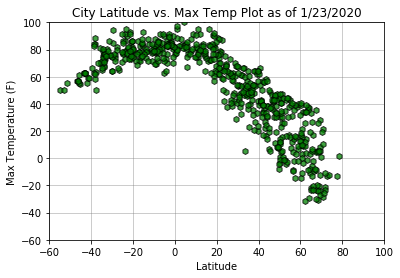

In [29]:
fig1,ax1=plt.subplots()
plt.scatter(weather_data['Lat'],weather_data['Max Temp'], marker="h", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temp Plot as of 1/23/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,100)
plt.ylim(-60,100)
ax1.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax1.xaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax1.set_axisbelow(True)
plt.savefig("./Output/LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

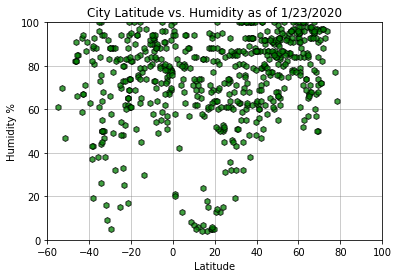

In [28]:
fig2,ax2=plt.subplots()
plt.scatter(weather_data['Lat'],weather_data['Humidity'],marker="h", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity as of 1/23/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(-60,100)
plt.ylim(0,100)
ax2.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax2.xaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax2.set_axisbelow(True)
plt.savefig("./Output/LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

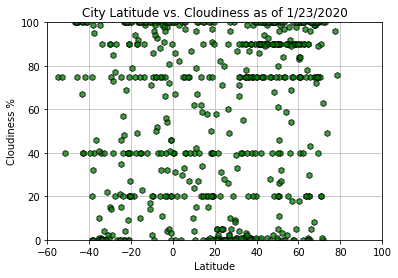

In [27]:
fig3,ax3=plt.subplots()
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'],marker="h", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness as of 1/23/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-60,100)
plt.ylim(0,100)
ax3.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax3.xaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax3.set_axisbelow(True)
plt.savefig("./Output/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

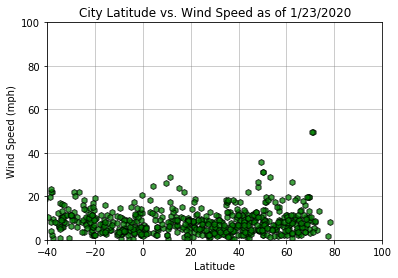

In [26]:
fig4,ax4=plt.subplots()
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'], marker="h", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed as of 1/23/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-40,100)
plt.ylim(0,100)
ax4.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax4.xaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax4.set_axisbelow(True)
plt.savefig("./Output/LatVsWindSpeed.png")
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames
nhemisphere_df=weather_data.loc[weather_data['Lat']>0]
nhemisphere_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Sorland,75,NO,1580223580,100,67.67,12.69,35.60,16.11
1,1,Teruel,100,ES,1580223581,62,40.67,-0.67,66.20,17.22
3,3,Nome,1,US,1580223583,57,64.50,-165.41,-11.20,3.36
4,4,Povenets,100,RU,1580223583,92,62.85,34.83,14.09,8.23
5,5,Cayenne,75,GF,1580223583,74,4.93,-52.33,84.20,11.41
...,...,...,...,...,...,...,...,...,...,...
596,596,Prince George,90,CA,1580223602,92,53.92,-122.75,30.20,4.70
597,597,Kolosovka,54,RU,1580223686,96,56.47,73.61,-9.06,8.41
598,598,Padampur,8,IN,1580223686,80,29.68,73.62,54.18,7.45
599,599,Aquin,50,HT,1580223686,68,18.28,-73.40,76.50,0.47


In [12]:
shemisphere_df=weather_data.loc[weather_data['Lat']<0]
shemisphere_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,2,Bredasdorp,0,ZA,1580223582,44,-34.53,20.04,78.80,16.75
7,7,Kieta,88,PG,1580223586,80,-6.22,155.63,82.06,7.38
8,8,Esperance,90,AU,1580223587,94,-33.87,121.90,68.00,10.29
10,10,Ushuaia,75,AR,1580223341,61,-54.80,-68.30,50.00,20.80
11,11,Faanui,100,PF,1580223588,76,-16.48,-151.75,82.29,9.08
...,...,...,...,...,...,...,...,...,...,...
588,588,Sorong,0,ID,1580223685,92,-0.88,131.25,74.86,2.66
589,589,Salgueiro,50,BR,1580223685,54,-8.07,-39.12,85.32,4.21
590,590,La Serena,90,CL,1580223685,88,-29.91,-71.25,64.40,11.41
594,594,Namatanai,96,PG,1580223686,81,-3.67,152.43,82.67,17.27


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8790238458702998


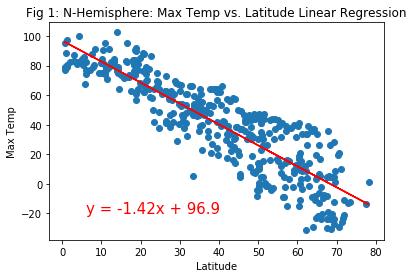

In [24]:
x= nhemisphere_df['Lat']
y= nhemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Fig 1: N-Hemisphere: Max Temp vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("./Output/NH_MaxTempVsLat_Reg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5972436091517723


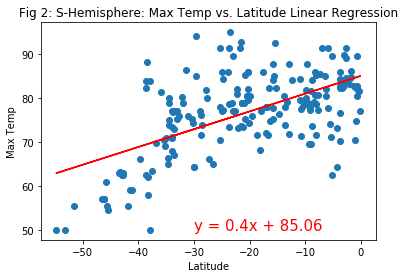

In [25]:
x= shemisphere_df['Lat']
y= shemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Fig 2: S-Hemisphere: Max Temp vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("./Output/SH_MaxTempVsLat_Reg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3941275221853578


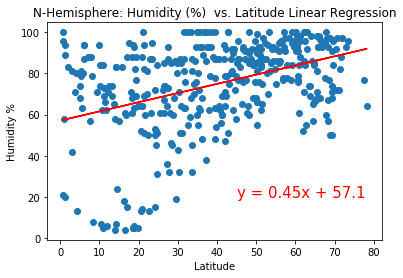

In [15]:
x= nhemisphere_df['Lat']
y= nhemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("N-Hemisphere: Humidity (%)  vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("./Output/NH_HumVsLat_Reg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21052503694698946


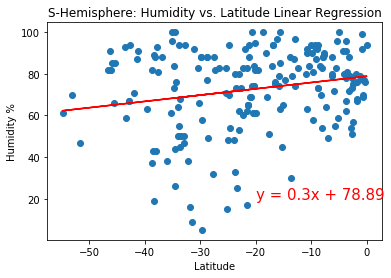

In [21]:
x= shemisphere_df['Lat']
y= shemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("S-Hemisphere: Humidity vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("./Output/SH_HumVsLat_Reg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27674734674872054


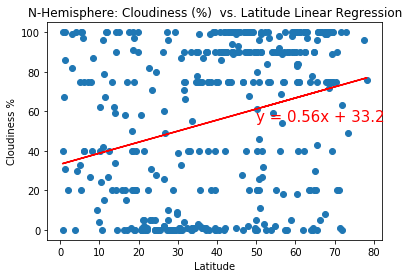

In [16]:
x= nhemisphere_df['Lat']
y= nhemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("N-Hemisphere: Cloudiness (%)  vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,55),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("./Output/NH_CloudVsLat_Reg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16093048763165155


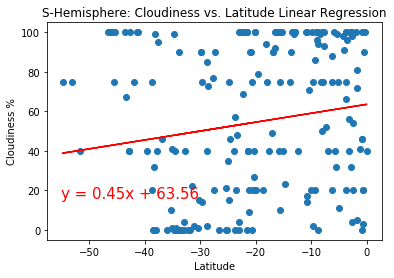

In [17]:
x= shemisphere_df['Lat']
y= shemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("S-Hemisphere: Cloudiness vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,16),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("./Output/SH_CloudVsLat_Reg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11095446623392279


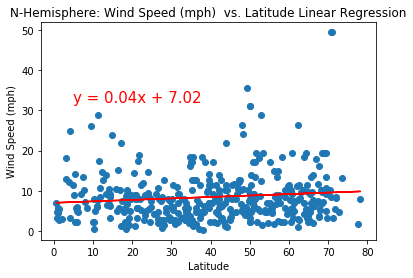

In [18]:
x= nhemisphere_df['Lat']
y= nhemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("N-Hemisphere: Wind Speed (mph)  vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,32),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("./Output/NH_WindVsLat_Reg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.33825741853703706


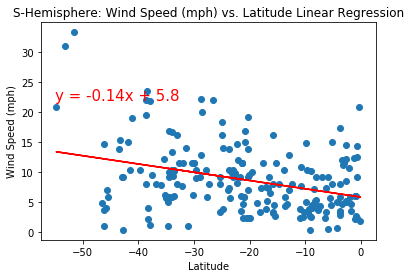

In [19]:
x= shemisphere_df['Lat']
y= shemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("S-Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("./Output/SH_WindVsLat_Reg.png")
plt.show()